# Target Features

In [2]:
# target_features = ['GrainYield']
target_features = ['Days2Maturity']


path = r'./Data/3. merged data/no outliers dropped/'
# path = r'./Data/3. merged data/dropped only 1 round/'
# path = r'./Data/3. merged data/all outliers dropped repeatatively/'

# Importing Libraries

In [3]:
import os
import csv
import numpy as np
import pandas as pd
from copy import copy
from datetime import datetime as dt

# Dictionaries
import json
from pprint import pprint

# Iterate in loops
import itertools
from itertools import zip_longest

# Simpsons integration
from numpy import trapz
from scipy.integrate import simps

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# To display df nicely in loops
from IPython.display import display 
# Display rows and columns Pandas
pd.options.display.max_columns = 100
pd.set_option('display.max_rows',100)

# # For displaying max rows in series
# pd.options.display.max_rows = 10

# Importing data

In [4]:
# Prints the current working directory
os.getcwd()
# os.listdir()

'C:\\Users\\fahad\\MegaSync\\NMBU\\GitHub\\vPheno'

## Finding Username folder to make general path for multi PC use

In [5]:
username = str(os.getcwd()).split('\\')[2]
user_path = r'C:/Users/'+username+'/'
username, user_path

('fahad', 'C:/Users/fahad/')

## Declaring Import paths

In [6]:
main_path = r'./Data/'



## Declaring export paths
if target_features[0] == 'GrainYield':
    if path.split('/')[-2] == 'no outliers dropped':
        export_path = './Data/4. plots_GY_all_data/'
        export_path_comparability = './Data/4. plots_GY_all_data/comparability/'

    elif path.split('/')[-2] == 'dropped only 1 round':
        export_path = './Data/4. plots_GY_do1r/'
        export_path_comparability = './Data/4. plots_GY_do1r/comparability/'

    elif path.split('/')[-2] == 'all outliers dropped repeatatively':
        export_path = './Data/4. plots_GY_aodr/'
        export_path_comparability = './Data/4. plots_GY_aodr/comparability/'

elif target_features[0] == 'Days2Maturity':
    if path.split('/')[-2] == 'no outliers dropped':
        export_path = './Data/4. plots_DM_all_data/'
        export_path_comparability = './Data/4. plots_DM_all_data/comparability/'

    elif path.split('/')[-2] == 'dropped only 1 round':
        export_path = './Data/4. plots_DM_do1r/'
        export_path_comparability = './Data/4. plots_DM_do1r/comparability/'

    elif path.split('/')[-2] == 'all outliers dropped repeatatively':
        export_path = './Data/4. plots_DM_aodr/'
        export_path_comparability = './Data/4. plots_DM_aodr/comparability/'
                    
    
# Create export_path folder if not exists already
os.makedirs(path, exist_ok=True)
os.makedirs(export_path, exist_ok=True)
os.makedirs(export_path_comparability, exist_ok=True)

# os.listdir(path)

In [7]:
# Making dictionary of files in each folder, in case there are multiple types of data
dict_paths = {}
def explore(starting_path):
    for dirpath, dirnames, filenames in os.walk(starting_path):
        dict_paths[dirpath.split('/')[-2]] = filenames
#     pprint(dict_paths)
explore(path)

# Data Preparation
## Creating list of complete files

In [8]:
# Get the list of all files in directory tree at given path

files_with_address = []
files_list = []

for (dirpath, dirnames, filenames) in os.walk(path):
    files_with_address += [os.path.join(dirpath, file) for file in filenames]
    files_list.extend(filenames)
    
print(len(files_with_address), 'files found in the directory')
# files_with_address
# files_list

14 files found in the directory


## Data Checking/control

### Check for duplicate filenames

In [9]:
print('Total number of files are :', len(files_list))

print('Number of unique file names are:', len(set(files_list)))

print('There is/are', len(files_list) - len(set(files_list)),'duplicate file name/names.')
if len(files_list) - len(set(files_list)) > 0:
    raise NameError

Total number of files are : 14
Number of unique file names are: 14
There is/are 0 duplicate file name/names.


# Importing data files to Pandas

In [13]:
all_df = []
for data in files_with_address:
    file_name = os.path.splitext(os.path.basename(data))[0]

    # Replce all invalid characters in the name
    file_name = file_name.replace(" ", "_")
    file_name = file_name.replace("-", "_")
    file_name = file_name.replace(")", "")
    file_name = file_name.replace("(", "")
    df_name = file_name.replace(".", "")
    # Test: Check if the same date is already present in the current dict key
    if df_name in all_df:
        print(f'A file with the same name {df_name} has already been imported. \n Please check if there is duplication of data.')
        raise NameError
    all_df.append(df_name)

    locals()[df_name] = pd.read_csv(data, index_col=False)
    print(df_name, '=====', locals()[df_name].shape)
# all_df

Graminor_2019_Simps ===== (600, 122)
Graminor_2019_Trapz ===== (600, 122)
Graminor_2020_Simps ===== (800, 122)
Graminor_2020_Trapz ===== (800, 122)
Masbasis_2019_Simps ===== (528, 123)
Masbasis_2019_Trapz ===== (528, 123)
Masbasis_2020_Simps ===== (624, 125)
Masbasis_2020_Trapz ===== (624, 125)
Robot_2020_Simps ===== (96, 124)
Robot_2020_Trapz ===== (96, 124)
Staur_2019_Simps ===== (1328, 126)
Staur_2019_Trapz ===== (1328, 126)
Staur_2020_Simps ===== (1488, 123)
Staur_2020_Trapz ===== (1488, 123)


In [10]:
print(f'Total imported {len(all_df)}')
# all_df

Total imported 14


## Importing Weather variables, yield columns, spectral indices, base indices columsn list

In [20]:
a_file = open(main_path+'vollebekk_weather_columns.json', "r")
output_str = a_file.read()
# The file is imported as string

# Converting it to python format
weather_cols_vollebekk = json.loads(output_str)
a_file.close()

pprint(len(weather_cols_vollebekk))

80


In [12]:
a_file = open(main_path+'staur_weather_columns.json', "r")
output_str = a_file.read()
# The file is imported as string

# Converting it to python format
weather_cols_staur = json.loads(output_str)
a_file.close()

pprint(len(weather_cols_staur))

80


In [13]:
a_file = open(main_path+"yield_columns.json", "r")
output_str = a_file.read()

# The file is imported as string
# Converting it to python format
yield_cols = json.loads(output_str)
a_file.close()
print(yield_cols)

['Entry', 'CodeName', 'Block', 'Pedigree', 'Replicates', 'iBlock', 'Heading_Date', 'Maturity_Date', 'Days2Maturity', 'Line', 'Lodging', 'GrainYield', 'Days2Heading', 'Name']


In [14]:
a_file = open(main_path+"spectral_indices_columns.json", "r")
output_str = a_file.read()

# The file is imported as string
# Converting it to python format
spectral_indices_all = json.loads(output_str)
a_file.close()
print(spectral_indices_all)

['NDVI', 'MTCI', 'DVI', 'GDVI', 'EXG', 'EXGR', 'RDVI', 'TDVI', 'GNDVI', 'NDRE', 'SCCI', 'EVI', 'TVI', 'VARI', 'GARI', 'GCI', 'GLI', 'NLI', 'MNLI', 'SAVI', 'GSAVI', 'OSAVI', 'GOSAVI', 'MSAVI2', 'MSR', 'GRVI', 'WDRVI', 'SR']


In [15]:
a_file = open(main_path+"base_indices_columns.json", "r")
output_str = a_file.read()

# The file is imported as string
# Converting it to python format
base_indices = json.loads(output_str)
a_file.close()
print(base_indices)

['Blue', 'Green', 'Red', 'RedEdge', 'NIR']


## Defining categories of features

In [16]:
# ToDo: Add check for duplicate columns in the df
base_indices
spectral_indices_all 
drop_indices = ['EVI', 'GLI', 'MTCI']
spectral_indices = [x for x in spectral_indices_all if x not in drop_indices]

# Staur weather columns are all also present in Vollebekk weather so they can be use as general weather features
weather_features = weather_cols_staur.copy()
environment_var = weather_features + ['Staur_Env', 'Vollebekk_Env']
# yield_cols

# Dropping DF which donot have the Target Feature

In [17]:
# Dropping unnecessary columns
all_df_dm = []
for df in all_df:
    temp_df = locals()[df].copy()
    if target_features[0] in temp_df.columns.tolist():
        all_df_dm.append(df)
#         print(df)

In [18]:
all_df_simps = [x for x in all_df_dm if 'Simps' in x]
all_df_trapz = [x for x in all_df_dm if 'Trapz' in x]
# all_df_simps, all_df_trapz

# Dropping unnecessary columns


In [19]:
# Dropping unnecessary columns
for df in all_df_dm:
    temp_df = locals()[df].copy()
    locals()[df] = temp_df[base_indices+spectral_indices_all+environment_var+['Name',target_features[0]]]
    print(df, temp_df.shape, '==>', locals()[df].shape)

Masbasis_2019_Simps (528, 123) ==> (528, 117)
Masbasis_2019_Trapz (528, 123) ==> (528, 117)
Masbasis_2020_Simps (624, 125) ==> (624, 117)
Masbasis_2020_Trapz (624, 125) ==> (624, 117)
Robot_2020_Simps (96, 124) ==> (96, 117)
Robot_2020_Trapz (96, 124) ==> (96, 117)
Staur_2019_Simps (1328, 126) ==> (1328, 117)
Staur_2019_Trapz (1328, 126) ==> (1328, 117)


# Dealing with Nan values

## Dropping Missing values

In [20]:
# Dropping rows with missing value in any column
for df in all_df_dm:
    temp_df = locals()[df].copy()
    locals()[df] = temp_df.dropna(axis=0)
    print(temp_df.shape[0] - locals()[df].shape[0], ' rows dropped in ', df)
#     print(locals()[df].shape[0])

0  rows dropped in  Masbasis_2019_Simps
0  rows dropped in  Masbasis_2019_Trapz
112  rows dropped in  Masbasis_2020_Simps
112  rows dropped in  Masbasis_2020_Trapz
8  rows dropped in  Robot_2020_Simps
8  rows dropped in  Robot_2020_Trapz
800  rows dropped in  Staur_2019_Simps
800  rows dropped in  Staur_2019_Trapz


# Plotting Grain Yield

In [21]:
# import matplotlib.pyplot as plt
# rng = np.random.RandomState(10)  # deterministic random data
# a = np.hstack((rng.normal(size=1000),
#                rng.normal(loc=5, scale=2, size=1000)))
# _ = plt.hist(a, bins='auto')  # arguments are passed to np.histogram
# plt.title("Histogram with 'auto' bins")
# Text(0.5, 1.0, "Histogram with 'auto' bins")
# plt.show()

In [22]:
# plt.hist(temp_df.values.reshape((20,int(len(temp_df.values)/20))).T)
# plt.show()

In [23]:
# plt.hist(np.histogramdd(temp_df.values)[0], np.histogramdd(temp_df.values)[1])
# np.histogramdd(temp_df.values)

In [24]:
# for df in all_df_simps:
#     temp_df = locals()[df].GrainYield.copy()
#     temp_df.dropna(axis=0)
#     plt.hist(temp_df.values)
# #     plt.hist(temp_df.values.reshape((20,int(len(temp_df.values)/20))))
#     plt.title(df)
#     plt.show()

# Data Normalization

## Plot one index for different fields to check comparability

In [25]:
# for col in base_indices+spectral_indices_all:
# #     col='Blue'
#     fig_size=(8, 5)
#     fig, ax = plt.subplots(figsize=fig_size)
#     plots = ax

#     for df in all_df_simps:
# #         if not 'Robot' in df and  not 'Staur' in df:
# #         if 'Gram' in df and  'Masb' in df:
# #             if '2020' in df:
#         temp_df = locals()[df].copy()
#         ax.boxplot(sorted(temp_df[col].values), positions = [all_df_simps.index(df)], labels=[df.split('_')[0][:5]+'_'+df.split('_')[1]])
# #         ax.plot(sorted(temp_df[col].values), label=df.split('_')[0]+'_'+df.split('_')[1])
#     # Printing the band/index name in plot of the fiels_sample for reference
#     text = col
#     ax.text(.98, .98, text, ha='right', va='top', weight=100, color='blue', fontsize ='xx-large', transform=ax.transAxes)

#     ax.legend(loc=1)
#     plt.tight_layout()
#     plt.savefig(export_path_comparability+col+'_box.jpg',dpi=250, bbox_inches='tight', transform=ax.transAxes)
#     plt.show()
# #     break

In [26]:
# for col in base_indices+spectral_indices_all:
# #     col='Blue'
#     fig_size=(8, 5)
#     fig, ax = plt.subplots(figsize=fig_size)
#     plots = ax

#     for df in all_df_simps:
# #         if not 'Robot' in df and  not 'Staur' in df:
# #         if 'Gram' in df and  'Masb' in df:
# #             if '2020' in df:
#         temp_df = locals()[df].copy()
# #         ax.boxplot(sorted(temp_df[col].values), positions = [all_df_simps.index(df)], labels=[df.split('_')[0][:5]+'_'+df.split('_')[1]])
#         ax.plot(sorted(temp_df[col].values), label=df.split('_')[0]+'_'+df.split('_')[1])
#     # Printing the band/index name in plot of the fiels_sample for reference
#     text = col
#     ax.text(.87, .6, text, ha='center', va='top', weight=100, color='blue', fontsize ='xx-large', transform=ax.transAxes)

#     ax.legend(loc=1)
#     plt.tight_layout()
# #     plt.savefig(export_path_comparability+col+'_sorted.jpg',dpi=250, bbox_inches='tight', transform=ax.transAxes)
#     plt.show()
# #     break

In [27]:
# for col in base_indices+spectral_indices_all:
# #     col='Blue'
#     fig_size=(8, 5)
#     fig, ax = plt.subplots(figsize=fig_size)
#     plots = ax

#     for df in all_df_simps:
# #         if not 'Robot' in df and  not 'Staur' in df:
# #         if 'Gram' in df and  'Masb' in df:
# #             if '2020' in df:
#         temp_df = locals()[df].copy()
# #         ax.boxplot(sorted(temp_df[col].values), positions = [all_df_simps.index(df)], labels=[df.split('_')[0][:5]+'_'+df.split('_')[1]])
#         ax.plot((temp_df[col].values), label=df.split('_')[0]+'_'+df.split('_')[1])
#     # Printing the band/index name in plot of the fiels_sample for reference
#     text = col
#     ax.text(.87, .6, text, ha='center', va='top', weight=100, color='blue', fontsize ='xx-large', transform=ax.transAxes)

#     ax.legend(loc=1)
#     plt.tight_layout()
# #     plt.savefig(export_path_comparability+col+'_random.jpg',dpi=250, bbox_inches='tight', transform=ax.transAxes)
#     plt.show()
# #     break

## Normalizing the data using Z-Score from scipy

In [28]:
# X_train = np.array([[ 1., -1.,  2.],
#                     [ 2.,  0.,  0.],
#                     [ 0.,  1., -1.]])

# print(scaler.mean_)
# print(scaler.scale_)
# print(scaler.fit_transform(X_train))
# zscore(X_train[0])

In [29]:
from scipy.stats import zscore

for df in all_df_dm:
    temp_df = locals()[df].copy()
    for col in temp_df.columns:
        # Checking if the column is not a yield column
        if col not in yield_cols+environment_var:
            temp_df[col] = zscore(temp_df[col])

    locals()[df] = temp_df.copy()
    print(df)

Masbasis_2019_Simps
Masbasis_2019_Trapz
Masbasis_2020_Simps
Masbasis_2020_Trapz
Robot_2020_Simps
Robot_2020_Trapz
Staur_2019_Simps
Staur_2019_Trapz


## Checking comparability after normalization

In [30]:
# for col in base_indices+spectral_indices_all:
# #     col='Blue'
#     fig_size=(8, 5)
#     fig, ax = plt.subplots(figsize=fig_size)
#     plots = ax

#     for df in all_df_simps:
# #         if not 'Robot' in df and  not 'Staur' in df:
# #         if 'Gram' in df and  'Masb' in df:
# #             if '2020' in df:
#         temp_df = locals()[df].copy()
#         print(temp_df[col].values.max())
#         ax.boxplot(sorted(temp_df[col].values), positions = [all_df_simps.index(df)], labels=[df.split('_')[0][:5]+'_'+df.split('_')[1]])
# #         ax.plot(sorted(temp_df[col].values), label=df.split('_')[0]+'_'+df.split('_')[1])
#     # Printing the band/index name in plot of the fiels_sample for reference
#     text = col
#     ax.text(.98, .98, text, ha='right', va='top', weight=100, color='blue', fontsize ='xx-large', transform=ax.transAxes)

#     ax.legend(loc=1)
#     plt.tight_layout()
#     plt.savefig(export_path_comparability+col+'_norm_box.jpg',dpi=250, bbox_inches='tight', transform=ax.transAxes)
#     plt.show()
# #     break

# Correlation

## Scatter Plot

In [31]:
# for df in all_df_simps:
#     temp_df = locals()[df][base_indices+spectral_indices_all+[target_features[0]]].copy()
#     data = temp_df.copy()
#     for col in base_indices:
#         print(df)
#         df_a = temp_df[col]
#         df_b = temp_df[target_features[0]]


#         fig, ax = plt.subplots(1, figsize=(12,8))
#         sns.kdeplot(df_a, y=df_b, cmap='Blues',
#                    shade=True, thresh=0.05, clip=(-1,300))
#         plt.scatter(df_a, df_b, color='orangered')
#         plt.show()

## Heat Map

In [32]:
# for df in all_df_simps:
#     print(df)
#     temp_df = locals()[df][[target_features[0]]+spectral_indices_all].copy()
# #     temp_df = locals()[df][spectral_indices_all+[target_features[0]]].copy()
#     data = temp_df
#     columns = temp_df.columns
#     corr = data.corr(method='pearson')
#     fig_size=(15,8)

#     fig, ax = plt.subplots(figsize=fig_size)
    
#     mask = np.triu(np.ones_like(corr, dtype=np.bool))

    
#     ax = sns.heatmap(
#         corr, mask=mask,
#         vmin=-1, vmax=1, center=0,
#         cmap=sns.diverging_palette(20, 220, n=200),
#         square=True
#     )    
    
#     ax.set_xticklabels(
#         ax.get_xticklabels(),
#         rotation=45,
#         horizontalalignment='right'
#     );
# #     plt.savefig(export_path+df+'_corr.jpg',dpi=250, bbox_inches='tight', transform=ax.transAxes)

#     plt.show()

## Final

In [33]:
agg_method = 'Simps'
# agg_method = 'Trapz'

# feats = 'Spectral features'
feats = 'Weather features'

save_corr_fig = True
# save_corr_fig = False

<ipython-input-34-1b82f3e6029e>:65: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "transform" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(export_path+'all_mix_corr_norm'+trgt+agg_method+'_'+feat_s+'_.jpg',


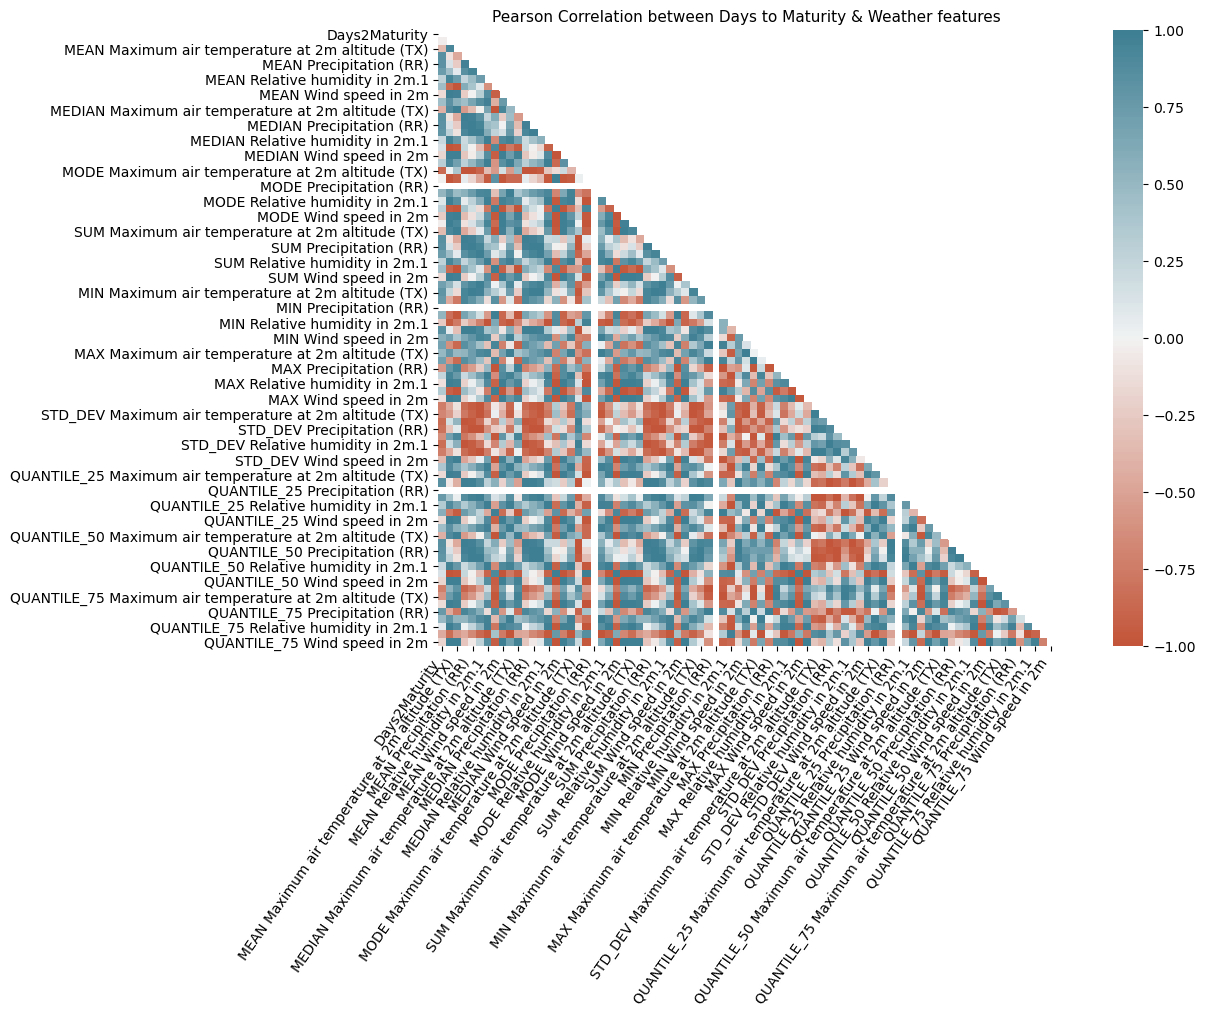

In [34]:
if agg_method == 'Simps':
    temp_list = [x for x in all_df_simps if not 'Robot' in x]
elif agg_method == 'Trapz':
    temp_list = [x for x in all_df_trapz if not 'Robot' in x]

if target_features[0] == 'GrainYield':
        trgt = '_GY_'
        titl = 'Grain Yield'
elif target_features[0] == 'Days2Maturity':
        trgt = '_DM_'
        titl = 'Days to Maturity'


# Making list of df for conct before training
# This is different form list of srtings, as this is a list of actual dataframes
df_list = []
for x in temp_list:
    df_list.append(locals()[x])

df_ = pd.concat(df_list)

if feats == 'Spectral features':
    data = df_[[target_features[0]]+base_indices+spectral_indices_all]
    columns = df_[[target_features[0]]+base_indices+spectral_indices_all].columns
    feat_s = '_spctrl'
    x_label_rotataion = 45
elif feats == 'Weather features':
    data = df_[[target_features[0]]+weather_features]
    columns = df_[[target_features[0]]+weather_features].columns
    feat_s = '_weather'
    x_label_rotataion = 55


corr = data.corr(method='pearson')
fig_size=(15,8)

fig, ax = plt.subplots(figsize=fig_size)

mask = np.triu(np.ones_like(corr, dtype=np.bool))

# cmap = sns.diverging_palette(250, 15, s=75, l=40,
#                              n=9, center="light", as_cmap=True)
# ax = sns.heatmap(
#     corr, mask=mask,
#     vmin=-1, vmax=1, center=0,
#     annot=True,fmt='.2f', square=True, cmap=cmap
    

ax = sns.heatmap(
    corr, mask=mask,fmt='.2f',
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)    

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=x_label_rotataion,
    horizontalalignment='right'
);

ax.set_title('Pearson Correlation between '+titl+' & '+feats,
            fontdict = {'fontsize' : 11})
if save_corr_fig:
    plt.savefig(export_path+'all_mix_corr_norm'+trgt+agg_method+'_'+feat_s+'_.jpg',
                dpi=250, 
                bbox_inches='tight',
                transform=ax.transAxes)

plt.show()

## Restart the kernel

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")